# <span style="color:#00000">CIV4100: Assignment 2: Deep Learning, Perception and Validation</span> #




## Overview
This assignment includes the development, integration, testing and evaluation of the perception modules in automated driving systems (ADS). The assignment makes use of the accumulated knowledge and experiences learnt in the course, especially in Weeks 6, 7, 8 and 10.


- Tasks: There are two parts/tasks in this assignment: 
1. Developing a deep learning system for perception of signboards; 
2. Testing the developed perception system.

- Time: These tasks can be commenced at any time during the semester, and should be submitted in the Moodle dropbox before or by the end of Week 12.

## Submissions
You must submit the followings:
- Your complete report using the Microsoft Word template provided.
- Your complete Jupyter (Python) scripts. 
- The video recording of showing your codes, main results and discussion.


## Important Note
This assignment is an individual assignment.

# **Student information**

You are required to provide the student ID below. This student ID is to guarantee that the test data are unique for you.

Replace this number by the numeric part in your student ID, say use 123456789 if your student ID is "ABC123456789"

In [128]:
studentid = 31105327

# **Part 1: Data analysis**


In this Part, you will carry out an **analysis of data** used for the perception of Automated Driving System (ADS). 


### Task 1.1. Dataset preparation

**Make the dataset ready for the analysis.**

Data preparation is the first step to build a machine learning or deep learning model. Data preparation is the process of collecting, combining, cleansing, and organizing data so that it can be used to train the models. In this task, you are required to make the data ready for analysis.


First, we need to download the dataset. For this assignment, we will use the `traffic_sign_final_dataset`

In [2]:
!wget --no-check-certificate "https://onedrive.live.com/download?cid=475DAB8C26138376&resid=475DAB8C26138376%21941&authkey=AAwDwhuIU599rTg" -O traffic_sign_final_dataset.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.


We unzip the dataset and remove the zip file (adding "-q" to ignore the output).

In [2]:
x = !unzip -q traffic_sign_final_dataset.zip
y = !rm -f traffic_sign_final_dataset.zip

Import necessary libraries

In [135]:
#Import necessary libraries
import matplotlib.pyplot as plt
from os import listdir
from os.path import join as join_path
from cv2 import imread
import random
import numpy as np


Import data from directory and visualize for verification

In [171]:
#importing all images from all classes
labels = ['20 km/h', '30 km/h', '50 km/h', '60 km/h', '70 km/h', '80 km/h', '80 km/h end', '100 km/h', '120 km/h', 'No overtaking',
               'No overtaking for trucks', 'Crossroad with secondary way', 'Main road', 'Give way', 'Stop', 'Road up', 'Road up for truck', 'Block',
               'Other dangerous', 'Turn left', 'Turn right', 'Winding road', 'Hollow road', 'Slippery road', 'Narrowing road', 'Roadwork', 'Traffic light',
               'Pedestrian', 'Children', 'Bike', 'Snow', 'Deer', 'End of the limits', 'Only right', 'Only left', 'Only straight', 'Only straight and right', 
               'Only straight and left', 'Take right', 'Take left', 'Circle crossroad', 'End of overtaking limit', 'End of overtaking limit for truck']

DIR = r'C:\Users\Omar\Desktop\Uni\2023\CIV4100\Assignment 2\traffic_sign_final_dataset\traffic_sign_final_dataset\Train'
NUM_CLASSES = len(labels)
unique_classes = [*range(NUM_CLASSES)]
unique_classes = np.array(unique_classes)
class_dirs = [str(x) for x in unique_classes]

image_set = []
label_set = []
image_set_sizes = []
print('Tracking the progress of classes:')
for i in unique_classes:
    print(i,end=" ")
    directory = join_path(DIR, class_dirs[i])
    for filename in listdir(directory):
        img = imread(join_path(directory,filename))
        if img is not None:
            image_set.append(img)
            label_set.append(i)
            image_set_sizes.append(len(img))

total_counts = [np.sum(label_set == label) for label in unique_classes]
total_num = len(image_set)

Tracking the progress of classes:
0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 

9 random images from original data:


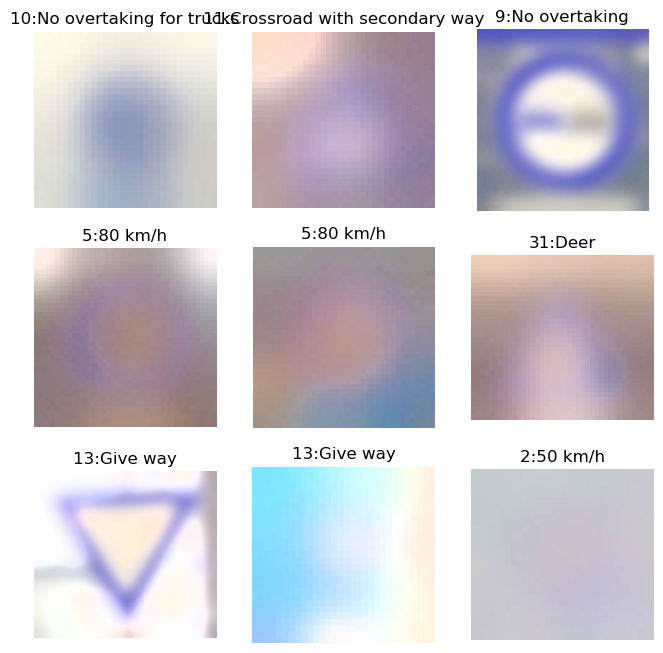

In [196]:
# Visualize the imported data randomly to make sure everyhting is right
def visualize_random_data(image_set,label_set,class_names):
        plt.figure(figsize=(8, 8))
        for i in range(9):
                s = random.randint(0,len(image_set))
                ax = plt.subplot(3, 3, i + 1)
                plt.imshow(image_set[s]/255.)
                str2 = class_names[label_set[s]]
                str1 = str(label_set[s])
                title = str1 + ':' + str2
                plt.title(title)
                plt.axis("off")
        plt.show()
print('9 random images from original data:')
visualize_random_data(image_set,label_set,labels)

### Task 1.2: Data analysis




**Process images and visualize their insights.**

In this task, you should perform image processing and data visualization to gain insights into the datasets used for the perception systems.


We import some nescessary libaries for this task:

1.2.1 Visualizing size and class distribution

In [3]:
#Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import random
from math import floor

Size distribution for original data:


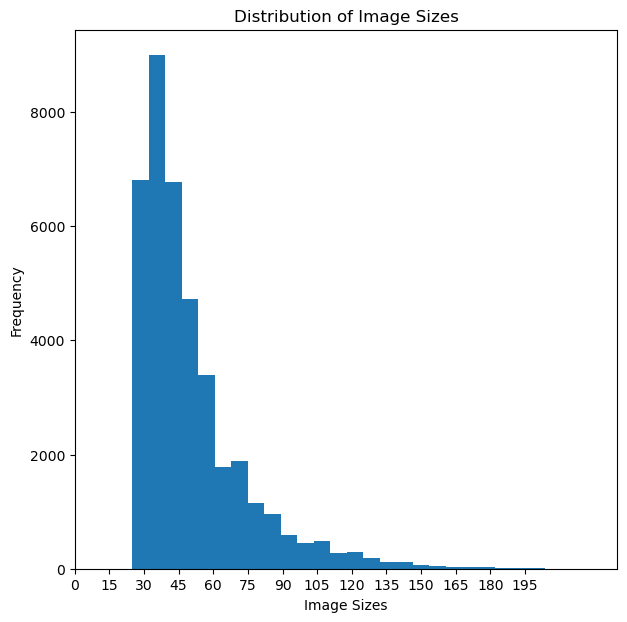

In [10]:
# Visualize size distribution of images
def visualize_size_distr(image_sizes):

    plt.figure(figsize=(7, 7))
    plt.hist(image_sizes, bins=28)  # Adjust the number of bins as needed
    plt.xlabel('Image Sizes')
    plt.ylabel('Frequency')
    plt.title('Distribution of Image Sizes')
    plt.xticks([*range(0,210,15)])
    plt.show()
print('Size distribution for original data:')
visualize_size_distr(image_set_sizes)

Class distribution for original data:


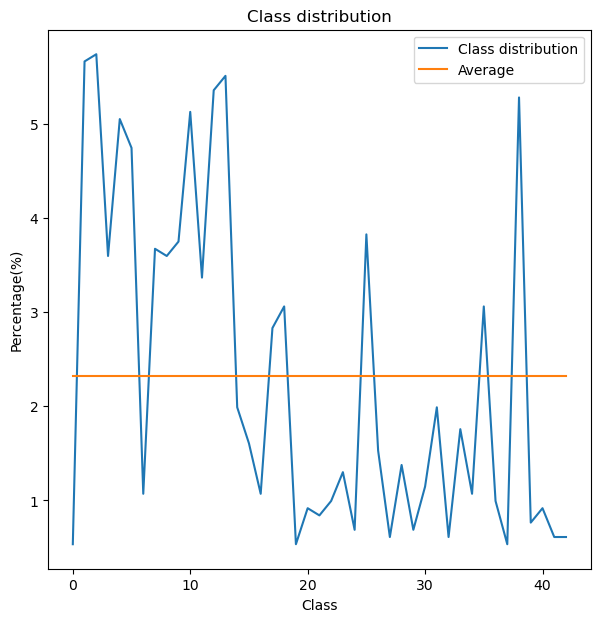

In [11]:
# Visualize class distribution

def visualize_class_distr(total_num,total_counts,NUM_CLASSES):
    plt.figure(figsize=(7, 7))
    plt.title('Class distribution')
    plt.xlabel('Class')
    plt.ylabel('Percentage(%)')

    plt.plot([*range(NUM_CLASSES)],[x/total_num*100 for x in total_counts])
    plt.plot([*range(NUM_CLASSES)],np.ones(NUM_CLASSES)*100/NUM_CLASSES)
    plt.legend(['Class distribution','Average'])


print('Class distribution for original data:')
visualize_class_distr(total_num,total_counts,NUM_CLASSES)

1.2.2 Under sampling

In [197]:
# Undersampling classes with number of images greater than average

count_threshold = int(total_num/NUM_CLASSES)
# Initializing arrays to store the undersampled data
undersampled_image_set = []
undersampled_label_set = []

for label in unique_classes:
        # Get the indices of images belonging to the certain class
        class_indices = np.where(label_set == label)[0]
        first_index = class_indices[0]
        num_images = total_counts[label]
        if num_images > count_threshold:
            # Sort the class images based on their size
            sorted_indices = sorted(class_indices, key=lambda i: len(image_set[i]))
            # Remove the smallest images until threshold is reached
            remove_indices = sorted_indices[:num_images - count_threshold]
            remove_indices = remove_indices - first_index
            class_indices = np.delete(class_indices, remove_indices)


        undersampled_image_set.extend([image_set[i] for i in class_indices])
        undersampled_label_set.extend([label_set[i] for i in class_indices])



9 random images from under sampled data:


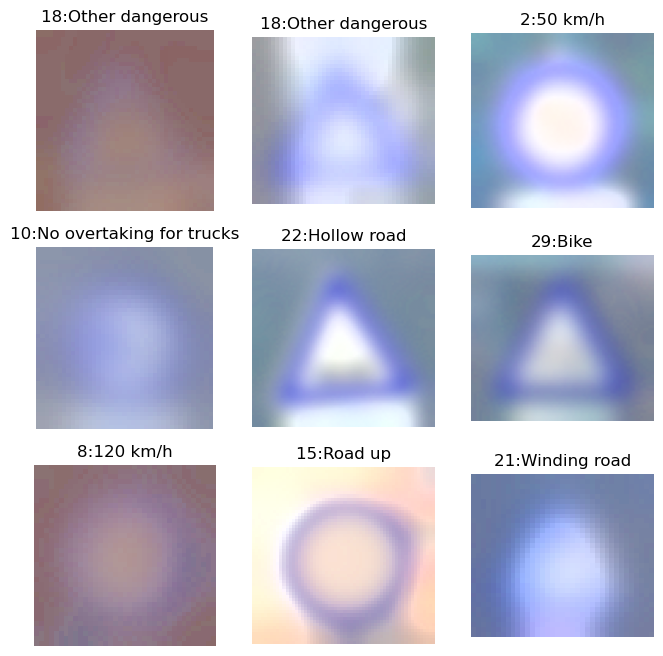

In [13]:
# Visualize the random samples from the undersampled data
print('9 random images from under sampled data:')
visualize_random_data(undersampled_image_set,undersampled_label_set,labels)

Size distribution for under sampled data:


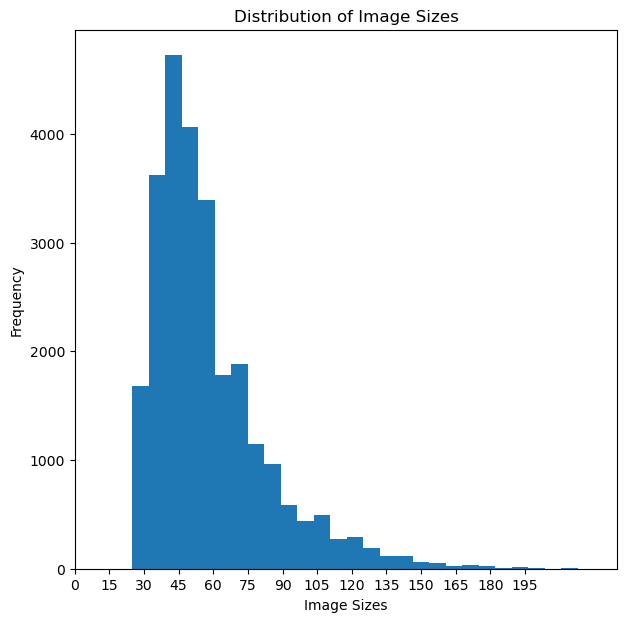

In [14]:
# Visualize size distribution of undersmapled data

# Finding the new size distribution after undersmapling
print('Size distribution for under sampled data:')
undersampled_image_set_sizes = []
for img in undersampled_image_set:
    undersampled_image_set_sizes.append(len(img))

visualize_size_distr(undersampled_image_set_sizes)


In [ ]:
# Visualize class distribution of undersampled data
undersampled_total_counts = [np.sum(undersampled_label_set == label) for label in unique_classes]
undersampled_total_num = len(undersampled_image_set)

print('Class distribution for under sampled data:')
visualize_class_distr(undersampled_total_num,undersampled_total_counts,NUM_CLASSES)

1.2.3 Data augmneting

In [198]:
# Augmenting the undersmapled data

low_count_classes = []

# Finding classes with number of image lower than the average of the original data
for x in unique_classes:
    if total_counts[x] < count_threshold:
        low_count_classes.append(x)


# Initializing the arrays to store augmented images and labels
augmented_images = []
augmented_labels = []

# Creating an instance of ImageDataGenerator with transformation paramaters
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    fill_mode='nearest'
)

# Creating a dictionary to keep track of the image count per class to stop when the number of images reaches the desired threshold
class_image_count = {}

# Iterating over the images and labels
for image, label in zip(undersampled_image_set, undersampled_label_set):
    if label in low_count_classes:
        # Checking if the current class has reached the threshold
        if label in class_image_count and class_image_count[label] >= count_threshold:
            continue  # Skip augmentation

        # Deciding the number of augmented copies for each image
        #it was chosen to be random since the number of images has to be an integer, so in the case that the number of extra image needed for each image is 3.5 let's say, we
        #will make 3 copies of 50% of the images, and 4 copies of the other 50%
        if(random.randint(0,1) > 0): 
            n = floor(count_threshold/total_counts[label])-1 
        else:
            n = floor(count_threshold/total_counts[label])

        img = np.expand_dims(image, axis=0)
        # Generating different augmented image each iteration from one image
        for i in range (n):
            augmented_image = datagen.flow(img, batch_size=1, shuffle=False).__next__()
            augmented_image = augmented_image.squeeze(axis=0)
            augmented_images.append(augmented_image)
            augmented_labels.append(label)

        # Updatimg the image count for the current class
            if label in class_image_count:
                class_image_count[label] += 1
            else:
                class_image_count[label] = 1

        # Addinh the augmented image and label to the arrays
    augmented_images.append(image)  
    augmented_labels.append(label)

In [ ]:
# Visualzing random samples from the augmented images
print('9 random images from augmented data:')
visualize_random_data(augmented_images,augmented_labels,labels)

In [ ]:
# Visualizing class distribution in augmented data
augmented_counts = [np.sum(augmented_labels == label) for label in unique_classes]
augmented_total = len(augmented_images)

visualize_class_distr(augmented_total,augmented_counts,NUM_CLASSES)

In [ ]:
# Visualize size distribution of augmented data

# Finding the new size distribution after augmentation
print('Size distribution for under sampled data:')
augmented_image_set_sizes = []
for img in augmented_images:
    augmented_image_set_sizes.append(len(img))

visualize_size_distr(augmented_image_set_sizes)

# **Part 2: Development of a deep learning-based perception model for AV**

With a new training dataset prepared from Part 1, you are required to build and train a CNN model and then a VGG model using Keras and TensorFlow. Their input was the traffic signs dataset you have just created. 

Please follow the instructions when developing your model. You are required to save the weight of your final models under .h5 format and submit them as a part of the Assignment 2.



### Task 2.1. Input processing

**Read the inputs (i.e., photos) into the format usable by the model, and then split them into the training, validation and testing with the ratio of 0.8:0.1:0.1. Some visualizations of data are necessary.**

In this section, you need to read the input (i.e., photos) into the data matrices that can be processed by the models. You are then required to split them into the training, validation and testing with the ratio of 0.8:0.1:0.1. Some visualization of data is necessary. 

2.1.1 Reszing and splitting data

In [175]:
#Import necessary libraries
import tensorflow as tf
from sklearn.model_selection import train_test_split
import numpy as np
import cv2 as cv
import math

In [226]:
# Reading the final form of pre-rpocessed data and resizing it
IMG_HEIGHT = 64
IMG_WIDTH = 64
channels = 3
dim = (IMG_HEIGHT,IMG_WIDTH)
NUM_CATEGORIES = 43

image_data = []
for img in augmented_images:
    image = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    image = cv.resize(image, dim)
    image_data.append(image)
label_data = augmented_labels


In [229]:
# Converting the data into tensors

image_data = np.array(image_data)
label_data = np.array(label_data)

image_data = tf.constant(image_data)
label_data = tf.constant(label_data)

In [230]:
#Splitting the data into train, validation and testing data

s = random.randint(0,NUM_CATEGORIES)#introducing a random variable to ensure data is shffled to acheive even distribution of classes in all splits

train_val_images, test_images = train_test_split(image_data.numpy(), test_size=0.1, random_state=s)
train_val_labels, test_labels = train_test_split(label_data.numpy(), test_size=0.1, random_state=s)

train_images, val_images = train_test_split(train_val_images, test_size=0.11, random_state=s)
train_labels, val_labels = train_test_split(train_val_labels, test_size=0.11, random_state=s)


2.1.2 Visualizing split data

In [ ]:
# Visualzing class distribution in all splits, as well as the main data

def visualize_splits_class_distr(image_data,label_data,train_images,train_labels,val_images,val_labels,test_images,test_labels,unique_classes):

    Num_of_images = len(image_data)
    Num_of_test_images = len(test_images)
    Num_of_val_images = len(val_images)
    Num_of_train_images = len(train_images)
    # Creating dictionaries to store the counts for each split
    total_counts = [np.sum(label_data == label) for label in unique_classes]
    train_counts = [np.sum(train_labels == label) for label in unique_classes]
    test_counts = [np.sum(test_labels == label) for label in unique_classes]
    val_counts = [np.sum(val_labels == label) for label in unique_classes]
    plt.figure(figsize=(7, 7))
    plt.title('Class dsitribution in all splits')
    plt.xlabel('Class')
    plt.ylabel('Percentage(%)')
    plt.plot([*range(NUM_CATEGORIES)],[x/Num_of_images*100 for x in total_counts], label = 'Dataset')
    plt.plot([*range(NUM_CATEGORIES)],[x/Num_of_train_images*100 for x in train_counts], label = 'Train')
    plt.plot([*range(NUM_CATEGORIES)],[x/Num_of_val_images*100 for x in val_counts], label = 'Val')
    plt.plot([*range(NUM_CATEGORIES)],[x/Num_of_test_images*100 for x in test_counts], label ='Test')
    plt.legend()
    plt.show()

visualize_splits_class_distr(image_data,label_data,train_images,train_labels,val_images,val_labels,test_images,test_labels,unique_classes)

In [ ]:
# Visualizing first 20 images in the training set
def visualise_data(images, categories=None, 
                   test_categories=None, # for Part 2
                   class_name = labels, 
                   images_per_row = 5):
    n_images = len(images)
    n_rows = math.ceil(float(n_images)/images_per_row)
    fig = plt.figure(figsize=(2*images_per_row, 2*n_rows))
    fig.patch.set_facecolor('white')
    for i in range(n_images):
        ax = plt.subplot(n_rows, images_per_row, i+1)
        plt.imshow(images[i]/255.)
        if test_categories is not None:
            if categories[i] == test_categories[i]:
                color = 'green'
            else:
                color = 'red'
            plt.title(
                "expected={expected}\npredicted:{actual}".format(expected=class_name[categories[i]], actual=class_name[test_categories[i]]),color = color,fontsize = 6)
        else:
             plt.title("{label}".format(label=class_name[categories[i]]), color = 'blue', fontsize = 9)
        plt.axis("off")
        plt.xticks([])
        plt.yticks([])
    plt.show()


print('First 20 images in the training set:')
visualise_data(images = train_images[0:20],categories = train_labels)


In [ ]:
# Visualise first 20 images in the validation set

print('First 20 images in the validation set:')

visualise_data(images = val_images[0:20],categories = val_labels)


In [ ]:
# Visualise first 20 images in the test set

print('First 20 images in the test set:')

visualise_data(images = test_images[0:20],categories = test_labels)

### Task 2.2. Deep learning model development

**Develop a CNN-based perception model for detecting signboards and evaluate its performance.**

2.2.1 Import Libraries

In [179]:
# import necessary libraries
from tensorflow import keras
from sklearn.metrics import classification_report

2.2.2 Model setup

In [202]:
# Setting the model architecture
simple_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)),# convolution layer 1 (1),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),# max pooling layer 1 (2)
    keras.layers.Flatten(),  # flatten layer (3)
    keras.layers.Dense(128, activation='relu'),  # dense layer 1 (4)
    keras.layers.Dense(NUM_CATEGORIES, activation='softmax') # output layer (5)
])
print(simple_model.summary())

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 flatten_6 (Flatten)         (None, 30752)             0         
                                                                 
 dense_15 (Dense)            (None, 128)               3936384   
                                                                 
 dense_16 (Dense)            (None, 43)                5547      
                                                                 
Total params: 3,942,827
Trainable params: 3,942,827
Non-trainable params: 0
____________________________________________

2.2.3 Setup epoch and batch size

In [203]:
# Hyperparamaters
num_epochs = 20
batch_size = 64

2.2.4 Compile and train the model

In [204]:
# Compiling the model
simple_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
#Training and saving the model
simple_model.fit(
    train_images, np.array(train_labels), validation_data=(val_images,np.array(val_labels)),epochs=num_epochs, batch_size = batch_size)

simple_model.save('simple_model.h5')

2.2.5 Test the Model

In [205]:
# Testing and evaluating the model
simple_model = keras.models.load_model(r'C:\Users\Omar\Desktop\Uni\2023\CIV4100\Assignment 2\simple_model.h5')


label_pred = simple_model.predict(test_images,batch_size = batch_size)
label_pred = np.argmax(label_pred, axis=1)

# showing preciosion, recall and f1 scores
classification_rep = classification_report(test_labels, label_pred)
print("Classification Report:")
print(classification_rep)

63/63 [==============================] - 1s 9ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.44      0.51        91
           1       0.34      0.51      0.41        94
           2       0.36      0.35      0.36        85
           3       0.35      0.26      0.30        70
           4       0.45      0.28      0.35       103
           5       0.25      0.19      0.22        94
           6       0.57      0.87      0.69       119
           7       0.28      0.40      0.33        91
           8       0.62      0.49      0.54        76
           9       0.80      0.86      0.83        76
          10       0.98      1.00      0.99        98
          11       0.69      0.59      0.64       101
          12       0.95      0.96      0.95        94
          13       0.98      0.98      0.98        98
          14       0.91      0.94      0.92       126
          15       0.37      0.46      0.41        91
     

In [ ]:
#visualize predictions
s = 217
visualise_data(images= test_images[s:s+20],categories=test_labels[s:s+20],test_categories=label_pred[s:s+20])

### Task 2.3. Model improvement 

**Calibrate and finetune the model in Task 2.2 with an improved accuracy. The accuracy can be obtained by submitting your model’s output in the unit’s Kaggle which will indicate your performance against your peers in the class. See Task's requirement to learn how to submit to Kaggle**

2.3.1 Import Libraries

In [185]:
#Import necessary libraries
from tensorflow import keras
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv



2.3.2 Model Setup


In [206]:
# Setting the model architecture
finetuned_model = keras.Sequential([
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT, IMG_WIDTH, channels)),# convolution layer 1 (input layer)
    keras.layers.MaxPooling2D(pool_size=(2, 2)),# maxpooling layer 1 (hidden layer)
    keras.layers.Conv2D(64, (3, 3), activation='relu'), # convolution layer 2 (hidden layer)
    keras.layers.MaxPooling2D(pool_size=(2, 2)),# maxpooling layer 2 (hidden layer)
    keras.layers.Conv2D(128, (3, 3), activation='relu'),# convolution layer 4 (hidden layer)
    keras.layers.Conv2D(128, (3, 3), activation='relu'),# convolution layer 5 (hidden layer)
    keras.layers.MaxPooling2D(pool_size=(2, 2)),# max pooling layer 3 (hidden layer)
    keras.layers.Flatten(),  # flatten layer (hidden layer)
    keras.layers.Dense(512, activation='relu'),
    keras.layers.Dense(512, activation='relu'),  # dense layer 1 (hidden layer)
    keras.layers.Dense(NUM_CATEGORIES, activation='softmax') # dense layer 2 (output layer)
])
print(finetuned_model.summary())

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 31, 31, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 12, 12, 128)       73856     
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 128)      

2.3.3 Setup Hyperparameters

In [207]:
# Hyperparameters
num_epochs = 20
batch_size = 64

# Normalizing our images for better learning
norm_train_images = train_images/255.
norm_val_images = val_images/255.
norm_test_images = test_images/255.

2.3.4 Compile and train the model

In [208]:
#Compiling the model
finetuned_model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Training the model
checkpoint = keras.callbacks.ModelCheckpoint('finetuned_modelv2.h5', 
                             monitor='val_accuracy',
                             mode='max',
                             save_best_only=True,
                             verbose=1)

history = finetuned_model.fit(
    norm_train_images, np.array(train_labels), validation_data=(norm_val_images, np.array(val_labels)), epochs=num_epochs, callbacks=[checkpoint],steps_per_epoch = len(train_images) // batch_size)

2.3.5 Test the Model

In [209]:
# Testing and evaluating the model
finetuned_model = keras.models.load_model(r'C:\Users\Omar\Desktop\Uni\2023\CIV4100\Assignment 2\finetuned_modelv2.h5')

label_pred = finetuned_model.predict(norm_test_images,batch_size = batch_size)
label_pred = np.argmax(label_pred, axis=1)


classification_rep = classification_report(test_labels, label_pred)
print("Classification Report:")
print(classification_rep)
print(finetuned_model.summary)

63/63 [==============================] - 2s 25ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97        91
           1       0.98      0.90      0.94        94
           2       0.90      0.98      0.94        85
           3       0.94      0.97      0.96        70
           4       0.93      0.92      0.93       103
           5       0.93      0.99      0.96        94
           6       1.00      0.98      0.99       119
           7       0.98      0.88      0.92        91
           8       0.91      0.96      0.94        76
           9       0.99      0.97      0.98        76
          10       0.99      1.00      0.99        98
          11       0.97      1.00      0.99       101
          12       1.00      0.99      0.99        94
          13       1.00      1.00      1.00        98
          14       1.00      0.98      0.99       126
          15       0.98      0.97      0.97        91
    

In [ ]:
#visualize predictions
s = 413
visualise_data(images= test_images[s:s+20],categories=test_labels[s:s+20],test_categories=label_pred[s:s+20])

2.3.6 import Kaggle data

In [ ]:
# Download the test dataset
!wget --no-check-certificate "https://onedrive.live.com/download?cid=475DAB8C26138376&resid=475DAB8C26138376%21968&authkey=APkizHowCwOku4E" -O test_set.zip

In [211]:
#Define data directory
kaggle_dataset_dir = r'C:\Users\Omar\Desktop\Uni\2023\CIV4100\Assignment 2\Kaggle_dataset\Kaggle_dataset'


In [210]:
# Sort data
image_files = sorted(os.listdir(kaggle_dataset_dir))
sorted_indices = [*range(len(image_files))]
sorted_paths = [str(x) for x in sorted_indices]
sorted_paths = [x + '.png' for x in sorted_paths]


In [195]:
#Load and pre-proccess data
IMG_HEIGHT = 64
IMG_WIDTH = 64
kaggle_image_data = []
dim = (IMG_HEIGHT,IMG_WIDTH)
for path in sorted_paths:
    file_path = os.path.join(kaggle_dataset_dir, path)
    image = cv2.imread(file_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image,dim)

    kaggle_image_data.append(image)

norm_kaggle_image_data = [x/255. for x in kaggle_image_data]


kaggle_image_data = np.array(kaggle_image_data)
norm_kaggle_image_data = np.array(norm_kaggle_image_data)

kaggle_image_data = tf.constant(kaggle_image_data)
norm_kaggle_image_data = tf.constant(norm_kaggle_image_data)


In [ ]:
# Visualize data for confirmation
images = norm_kaggle_image_data[-20:]
fig = plt.figure(figsize=(2*4, 2*5))
for i in range(20):
        ax = plt.subplot(5, 4, i+1)
        plt.imshow(images[i])
        title = i
        plt.title(title, fontsize = 12)
        plt.axis("off")
        plt.xticks([])
        plt.yticks([])
plt.show()


2.3.7 Test model on Kaggle data

In [212]:
#Load model
model = keras.models.load_model(r'C:\Users\Omar\Desktop\Uni\2023\CIV4100\Assignment 2\finetuned_modelv2.h5')

In [213]:
#Test model
label_pred = model.predict(kaggle_image_data,batch_size=batch_size)
label_pred = np.argmax(label_pred, axis=1)

198/198 [==============================] - 5s 24ms/step


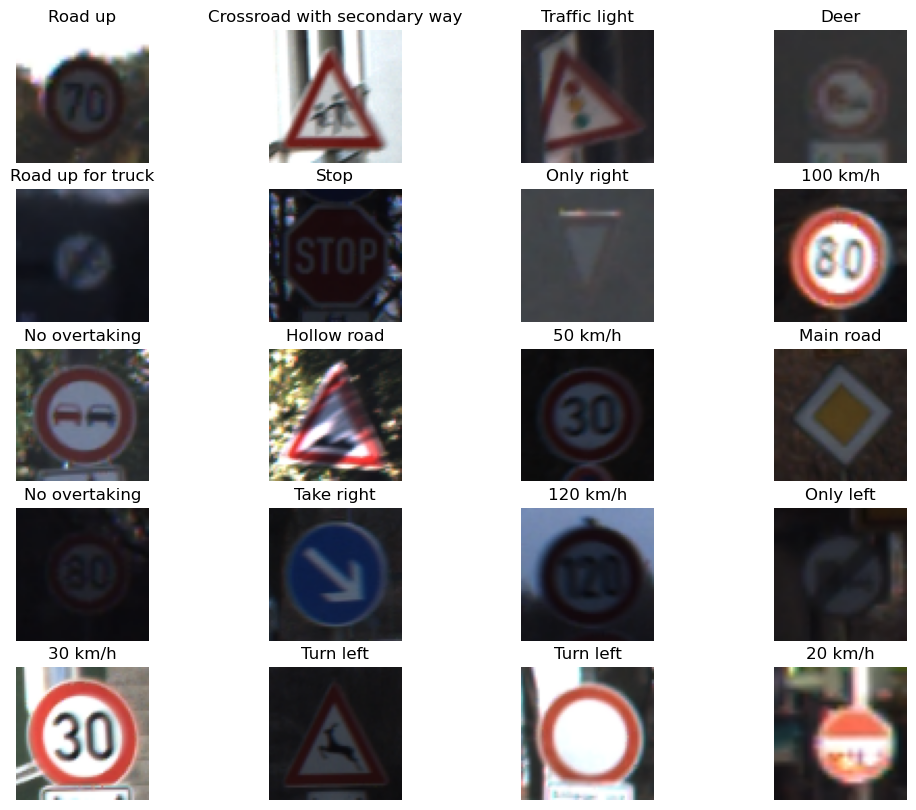

In [216]:
#visualize model predictions
plt.figure(figsize=(2.5*5, 2.5*4))
for i in range(20):
        ax = plt.subplot(5, 4, i+1)
        s = random.randint(0,len(kaggle_image_data))
        
        plt.imshow(kaggle_image_data[s])
        title = labels[label_pred[s]]
        plt.title(title, fontsize = 12)
        plt.axis("off")
        plt.xticks([])
        plt.yticks([])
plt.show()

2.3.8 Export model predictions

In [217]:
#Export model predicitons
kaggle_labels = label_pred
kaggle_class_names = [labels[x] for x in kaggle_labels]

csv_file = 'fine_tuned_modelv2_kaggle_predictions.csv'
data = list(zip([*range(len(kaggle_labels))], kaggle_class_names))
# Open the CSV file in write mode and write the data
with open(csv_file, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(['Image index', 'Label'])  # Write the header row
    writer.writerows(data)  # Write the data rows

# **Part 3: Testing and validation of the developed perception system**

In [170]:
#Import necessary libraries
from tensorflow import keras
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import random


### Task 3.1. Test case preparation

**Write functions to generate new test cases.**


In this task, you are required to create implement functions that can help generate new test cases. 

* Rotating the image (by 20 degrees - default)

* Zooming (1.3 times - default) into the centre of images

* Adding noise (normal distribution with mean 0 and sigma 0.6) 

In particular, you need to 
* Create a function for transforming the test case by zoom into the center of image. You can reuse cv2.resize(...,.., fx=factor, fy=factor) to resize with a factor. You may need to compute the center of image from its size.

* Create a function for transforming the test case by rotating the image. You can use cv2.getRotationMatrix2D() and cv2.warpAffine to rotate and wrap the image. Please do a Google search to understand its use cases.

* Create a function to add the noise. You can use cv2.randn((0,0,0),(0,level,0))) to implement the noise. Note that you need to copy the image before adding noise to it, otherwise, you will destroy the original images.


In [219]:
#transfomration fucntions
# zoom into images
def zoom_image(images, factor=1.3):
    result = []
    if factor>1:
        for image in images:
            r = cv.resize(image, None, fx=factor, fy=factor)
            xc,yc = int(r.shape[0]/2),int(r.shape[1]/2)
            xi,yi,ci = image.shape
            xs,ys = xc-int(xi/2),yc-int(yi/2)
            r = r[xs:xs+xi,ys:ys+yi]
            result.append(r)
    else:
        print("Factor must be larger than 1.")
    return np.array(result)

# rotate images by an angle 
def rotate_image(images, angle=20):
    result = []
    for image in images:
        rows, cols = image.shape[:2]
        rotation_matrix = cv.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
        rotated_image = cv.warpAffine(image, rotation_matrix, (cols, rows))
        result.append(rotated_image)
    return np.array(result)

# add noise to images
def noisify_image(images , level=0.6):
    
    result = []
    mean = 0
    sigma = 0.6
    for img in images: 
        rows, cols = image.shape[:2]
        gaussian = np.random.normal(mean, sigma, (rows,cols))
        noisy_image = np.zeros(img.shape, np.float32)
        if len(img.shape) == 2:
            noisy_image = img + gaussian
        else:
            noisy_image[:, :, 0] = img[:, :, 0] + gaussian
            noisy_image[:, :, 1] = img[:, :, 1] + gaussian
            noisy_image[:, :, 2] = img[:, :, 2] + gaussian
        noisy_image = noisy_image.astype(np.uint8)
        result.append(noisy_image)
   
    return result




For the ease of convenience, we use 20 first images extracted from test set as the source input for testing; and the next 20 images in the set for testing. Note that these images are unique for each students, based on the student_id provided in the header of this Jupyter code. 

1/1 [==============================] - 0s 96ms/step
expected class [6, 4, 36, 38, 25, 22, 28, 15, 12, 37, 8, 34, 14, 36, 35, 12, 18, 24, 17, 34]
actual class [ 6  4 36 38 25 22 28 15 12 37  8 34 14 36 35 12 18 24 17 34]
Testing with known test oracle


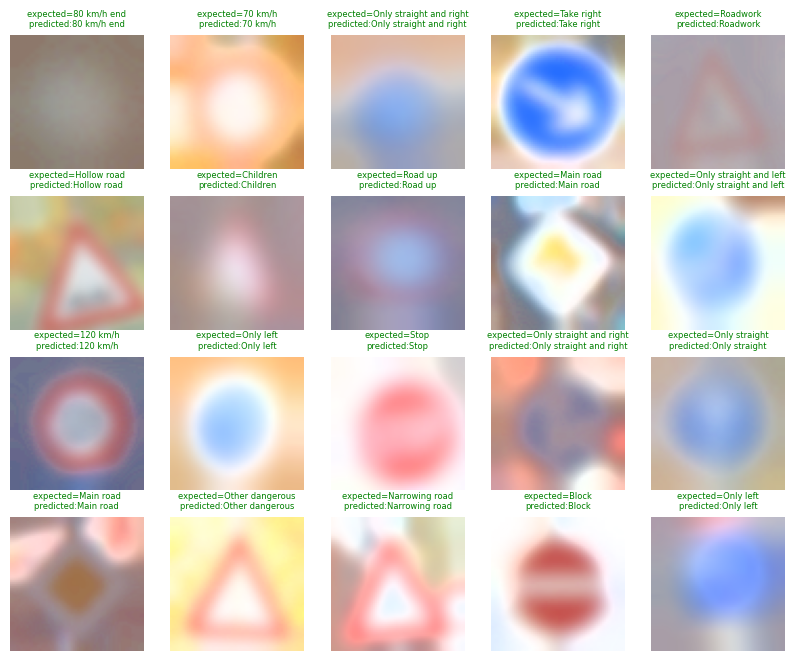

In [220]:
#Test oracle setup
# get the prediction result
def model_predict(model,input):

    output = model.predict(input)
    #return np.array([np.argmax(p) for p in output])
    return np.argmax(output, axis=1)

studentid = 31105327 #student ID used as seed
random.seed(studentid**2)
# the test oracle
id_oracle = [random.randint(1, len(test_images)) for _ in range(20)]
random.seed(studentid/2)
id_metamorphic = [random.randint(1, len(test_images)) for _ in range(20)]

model = keras.models.load_model(r'C:\Users\Omar\Desktop\Uni\2023\CIV4100\Assignment 2\finetuned_modelv1.h5')

# prepare test cases and execute program for original test case
testcase_original = [test_images[x] for x in id_oracle]
norm_testcase_original = np.array(testcase_original)/255.
output_expected = [test_labels[x] for x in id_oracle]
output_actual = model_predict(model,norm_testcase_original)

# visualise output
print('expected class',output_expected)
print('actual class',output_actual)
print('Testing with known test oracle')
visualise_data(testcase_original, output_expected, test_categories=output_actual)

### Task 3.2. Testing methods and results 

**Test the model with two methodologies, that is, traditional testing with the known test oracle, and metamorphic testing without knowing the test oracle.**

In this task, you are required to test the system with known test oracle. 

You are required to create 3 different sets of test cases using the above 3 different transformations.

1/1 [==============================] - 0s 20ms/step


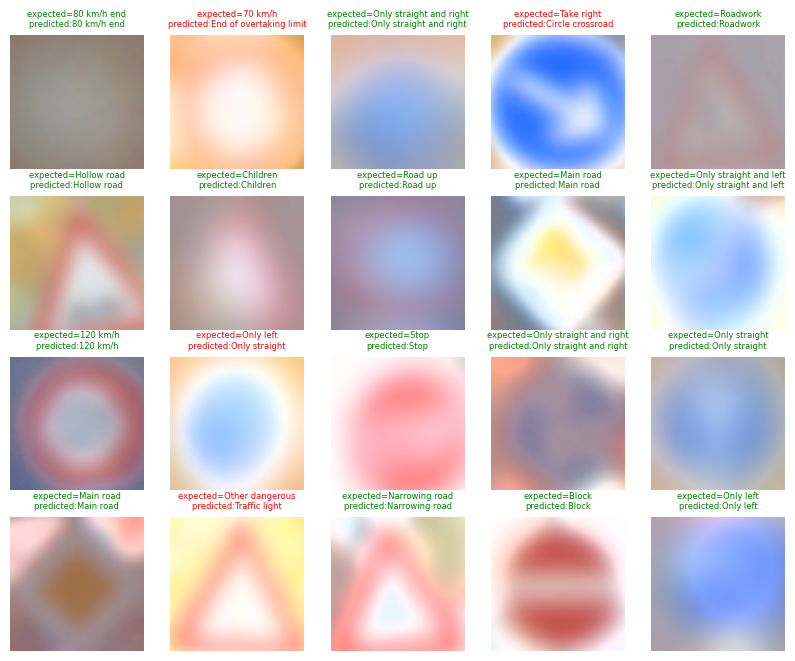

In [221]:
# Zoom test case
zoom_test_case = zoom_image(testcase_original)
norm_zoom_test_case = np.array(zoom_test_case)/255.
zoom_output = model_predict(model,norm_zoom_test_case)
visualise_data(zoom_test_case, output_expected, test_categories=zoom_output)


Better to execute the source test case once (instead of repeating for every MR)

1/1 [==============================] - 0s 180ms/step


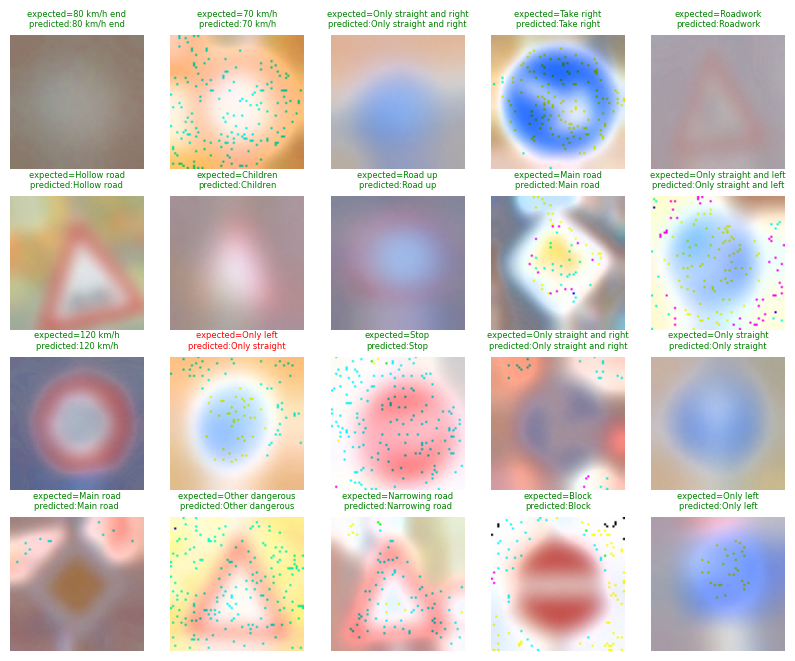

In [231]:
# Noisy test case
noisy_test_case = noisify_image(testcase_original)
norm_noisy_test_case = np.array(noisy_test_case)/255.
noisy_output = model_predict(model,norm_noisy_test_case)
visualise_data(noisy_test_case, output_expected,noisy_output)


1/1 [==============================] - 0s 22ms/step


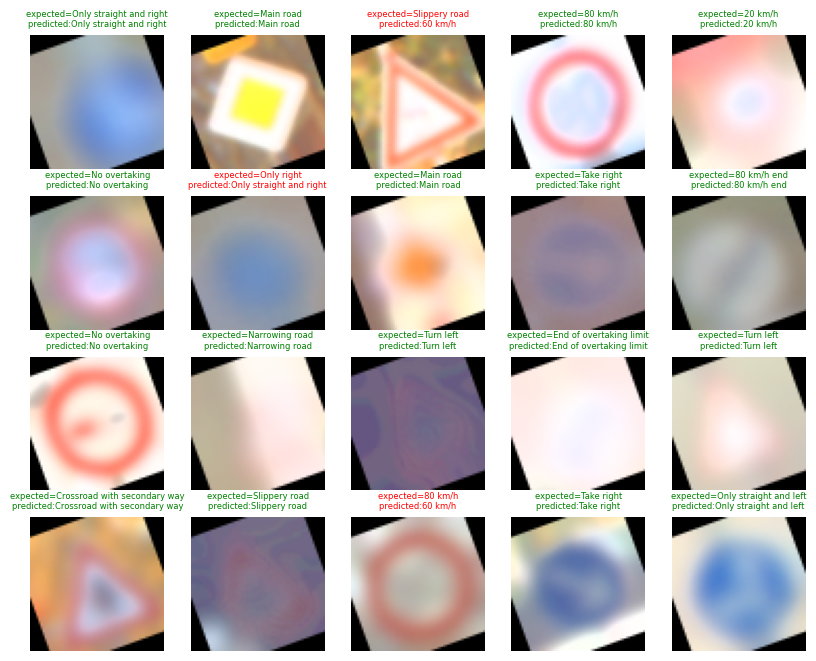

In [123]:
# Rotated test case
rotated_test_case = rotate_image(testcase_original)
norm_rotated_test_case = np.array(rotated_test_case)/255.
rotated_output = model_predict(model,norm_rotated_test_case)
visualise_data(rotated_test_case, output_expected,rotated_output)

In this task, you are required to test the system without knowing its labels. You can compare the follow-up labels against the source labels to determine whether the program is faulty or inaccurate. 

You are required to create 3 different sets of test cases using 3 different transformations. In total, you will have 20 pairs of test cases for each MRs 
*	MR1: 20 metamorphic groups (i.e., pairs) of the source (original) and follow-up (rotated) images.
*	MR2: 20 metamorphic groups (i.e., pairs) of the source (original) and follow-up (cropped) images.
*	MR3: 20 metamorphic groups (i.e., pairs) of the source (original) and follow-up (noisy) images.

In summary, you are required to execute the system under test with a total number of 80 test cases (20 source + 60 follow-ups). For each group (pair), you need to compare each source image against the follow-up image to see whether its label is the same or not. If it is not the same, the MR is known to be violated, and hence, the program is faulty or inaccurate.

To implement the Metamorphic Testing for system without oracle, you need to create follow-up test cases (i.e., followup_input) with its follow-up output (i.e., followup_output). You will then check whether the MR is violated by examining whether the source_output and followup_output are the same. If not the MR is violated. You can count the vilations with your own code or manually with the visualisation. 

In [124]:
#Metamorhpic testing tes_case setup
follow_up_testcase = [test_images[x] for x in id_metamorphic]
norm_follow_up_testcase = np.array(follow_up_testcase)/255.
metamorphic_output_expected = model_predict(model,norm_follow_up_testcase)


1/1 [==============================] - 0s 24ms/step


1/1 [==============================] - 0s 30ms/step


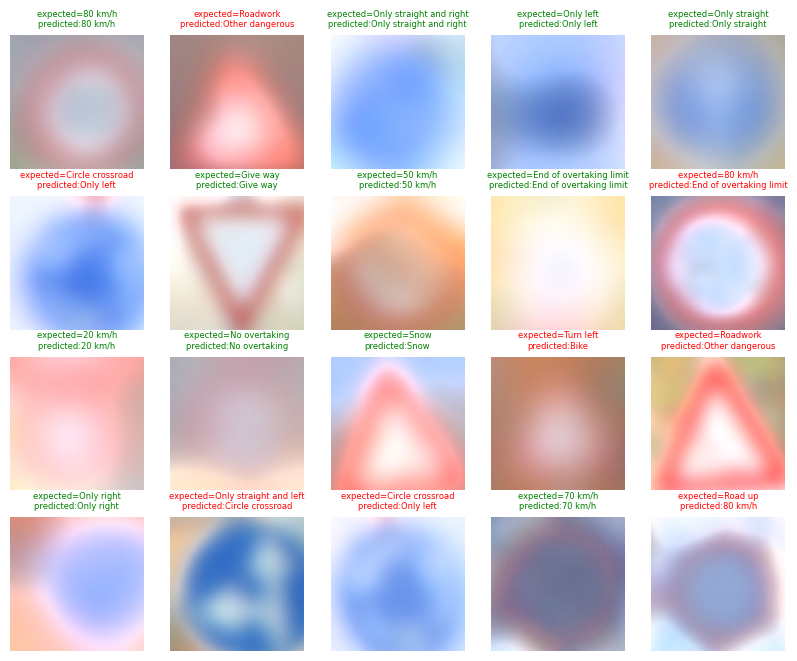

In [232]:
# Zoom test case
zoom_test_case = zoom_image(follow_up_testcase)
norm_zoom_test_case = np.array(zoom_test_case)/255.
zoom_output = model_predict(model,norm_zoom_test_case)
visualise_data(zoom_test_case, metamorphic_output_expected, test_categories=zoom_output)

1/1 [==============================] - 0s 23ms/step


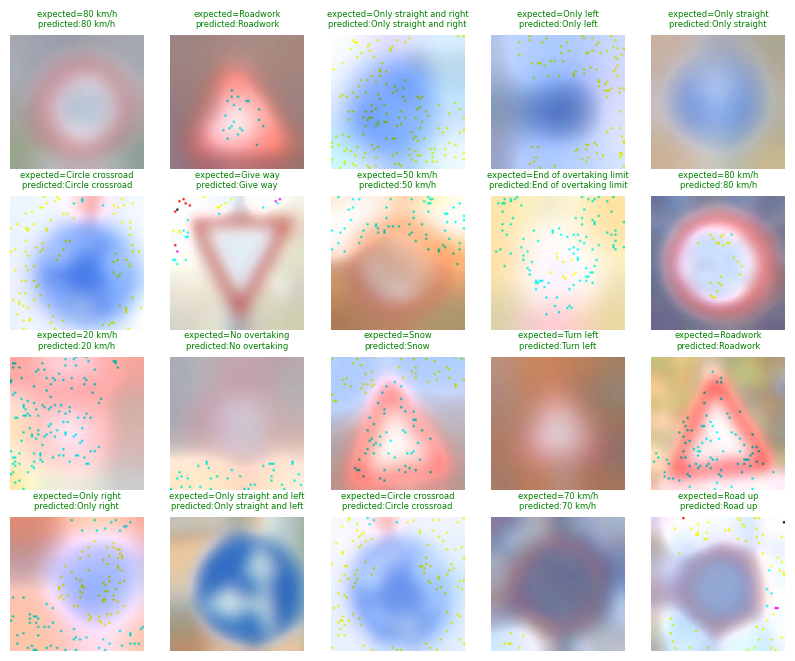

In [126]:
# Noisy test case
noisy_test_case = noisify_image(follow_up_testcase)
norm_noisy_test_case = np.array(noisy_test_case)/255.
noisy_output = model_predict(model,norm_noisy_test_case)
visualise_data(noisy_test_case, metamorphic_output_expected,noisy_output)

1/1 [==============================] - 0s 21ms/step


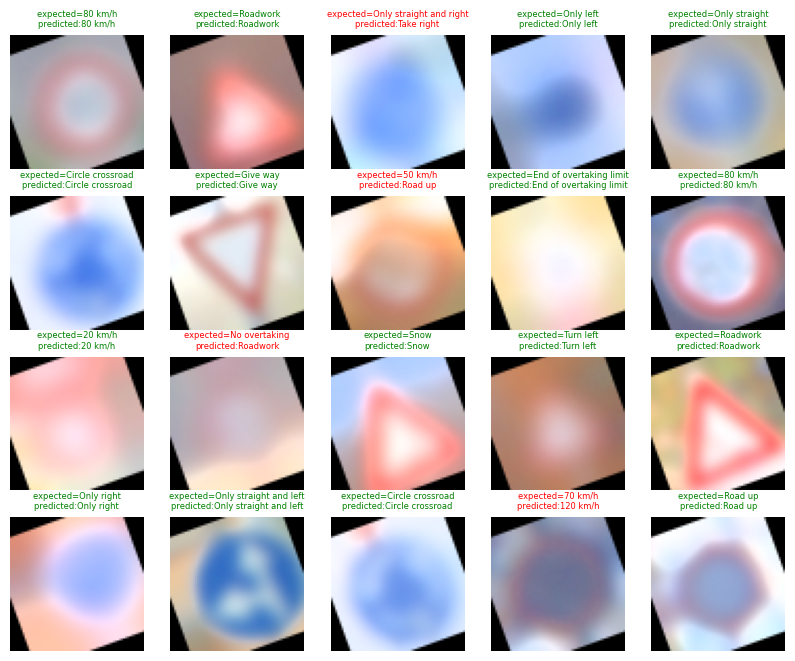

In [127]:
# Rotated test case
rotated_test_case = rotate_image(follow_up_testcase)
norm_rotated_test_case = np.array(rotated_test_case)/255.
rotated_output = model_predict(model,norm_rotated_test_case)
visualise_data(rotated_test_case, metamorphic_output_expected,rotated_output)

# **Part 4: Reporting and recording**

**You are required to prepare a report to summarize this code and a video recording to demononstrate its approach, results and insights. Please refer to the requirement document on the detailed steps you are required to do.**

**No code is required in this section.**

-- END OF ASSIGNMENT 2 --